In [2]:
import numpy as np
from keras.datasets import mnist 
from keras import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, Adam

import keras

import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
batch_size = 128
num_classes = 10
epochs = 20

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Visualization

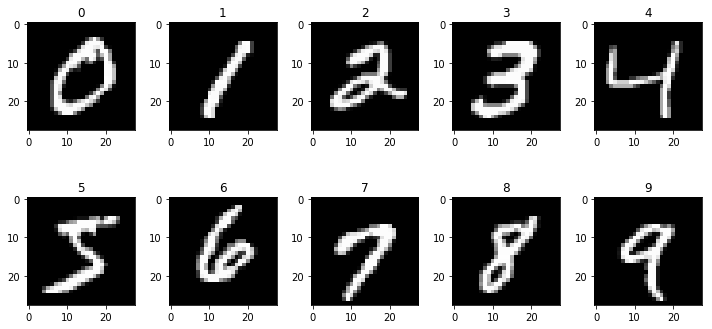

In [7]:
f, axs = plt.subplots(2,5, figsize=(10, 5))

for i, ax in enumerate(axs.ravel()):
    ind = np.argmax(y_train[:, i]==1)
    img = x_train[ind].reshape((28, 28))
    ax.imshow(img, cmap='gray')
    ax.set_title(i)

f.tight_layout()

## Keras guide

Let's recap logistic regression model

<img src="logreg_scheme.jpg">

We define input layers using ``Input`` from Keras. Only thing we need is to specify size of our images
```python
inputs = Input(shape=784)
```

Next we define our output layer using ``Dense``. We neeed to specify that we want sigmoid activation and pass previously created ``Input`` as inputs

```python
outputs = Dense(num_classes, activation='sigmoid')(inputs)
```

The rest is to define ``Model`` that consolidates inputs and outputs 
```python
model = Model(inputs=inputs, outputs=outputs)
```
and compile it, specifing desired loss function, optimizer algorithm (we will use Adam) and metrics that will be evaluated and printed

```python
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
```

Now we built our model and ready to fit it using ``fit`` function. 
```python
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=epochs, batch_size=batch_size)
```

## Logreg model

In [10]:
inputs = Input(shape=(784,))
outputs = Dense(num_classes, activation='softmax')(inputs)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=epochs, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3753 - acc: 0.8932 - val_loss: 0.2900 - val_acc: 0.9192
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2944 - acc: 0.9176 - val_loss: 0.2947 - val_acc: 0.9186
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2833 - acc: 0.9210 - val_loss: 0.2932 - val_acc: 0.9192
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2763 - acc: 0.9239 - val_loss: 0.2834 - val_acc: 0.9230
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2755 - acc: 0.9240 - val_loss: 0.2936 - val_acc: 0.9212
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2688 - acc: 0.9249 - val_loss: 0.2933 - val_acc: 0.9244
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2696 - acc: 0.9261 - val_loss: 0.3051 - val_acc

## Multiple layers model

In [13]:
inputs = Input(shape=(784,))
hidden = Dense(100, activation='relu')(inputs)
outputs = Dense(num_classes, activation='softmax')(hidden)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=epochs, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2459 - acc: 0.9280 - val_loss: 0.1446 - val_acc: 0.9586
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1169 - acc: 0.9645 - val_loss: 0.1320 - val_acc: 0.9620
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0922 - acc: 0.9720 - val_loss: 0.1148 - val_acc: 0.9664
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0795 - acc: 0.9759 - val_loss: 0.1242 - val_acc: 0.9628
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0722 - acc: 0.9785 - val_loss: 0.1089 - val_acc: 0.9719
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0668 - acc: 0.9803 - val_loss: 0.1145 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0610 - acc: 0.9819 - val_loss: 0.1582 - val_acc